**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# %load_ext pycodestyle_magic

In [2]:
def numpy_dist(X, Y):
    x_dist = (X ** 2).sum(axis=1)
    y_dist = (Y ** 2).sum(axis=1)
    xy_dist = X.dot(Y.T)
    dist = - 2 * xy_dist + y_dist + x_dist.reshape(-1, 1)
    return np.sqrt(dist)

In [9]:
# %%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self._k = n_neighbors
        self._X = None
        self._y = None
        
    
    def fit(self, X, y):
        self._X = np.copy(X)
        self._y = np.copy(y)
        
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        a = np.array(self._y[np.argsort(numpy_dist(X, self._X), axis=1)])[::,:self._k:]
        for i in range(X.shape[0]):
            elem, count_elem = np.unique(a[i], return_counts=True)
            y[i] = elem[np.argmax(count_elem)]
        return y
        
    def predict_proba(self, X):
        y = np.zeros((X.shape[0], np.unique(self._y).shape[0]))
        a = np.array(self._y[np.argsort(numpy_dist(X, self._X), axis=1)])[::,:self._k:]
        for i in range(X.shape[0]):
            elem, count_elem = np.unique(a[i], return_counts=True)
            y[i][elem.astype(int)] = count_elem/np.sum(count_elem)                    
        return y
    
    def score(self, X, y):
        return np.sum(self.predict(X)==y, dtype=np.float32)/len(y)

**IRIS**

In [32]:
iris = datasets.load_iris()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [34]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [35]:
%time clf.fit(X_train, y_train)

CPU times: user 1.08 ms, sys: 0 ns, total: 1.08 ms
Wall time: 25.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
%time my_clf.fit(X_train, y_train)

CPU times: user 394 µs, sys: 3 µs, total: 397 µs
Wall time: 18.9 ms


In [37]:
%time clf.predict(X_test)

CPU times: user 3.19 ms, sys: 0 ns, total: 3.19 ms
Wall time: 98.7 ms


array([0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1])

In [38]:
%time my_clf.predict(X_test)


CPU times: user 3.16 ms, sys: 28 µs, total: 3.19 ms
Wall time: 235 ms


array([0., 2., 1., 0., 2., 2., 1., 0., 1., 0., 1., 1., 0., 2., 1.])

In [39]:
%time clf.predict_proba(X_test)

CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 28.2 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [40]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 2.94 ms, total: 2.94 ms
Wall time: 11.6 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [41]:
clf.score(X_test, y_test)

0.9333333333333333

In [42]:
my_clf.score(X_test, y_test)

0.9333333333333333

In [43]:
# Задание 3

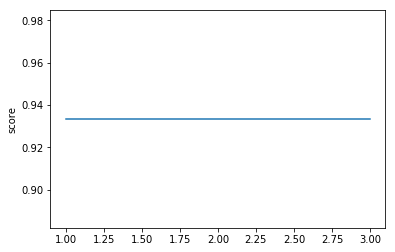

In [44]:
# base class
val_x = [k for k in range(1,4)]
val_y = [KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).score(X_test, y_test) for k in range(1,4)]
plt.plot(val_x, val_y)
plt.ylabel('score')
plt.show()

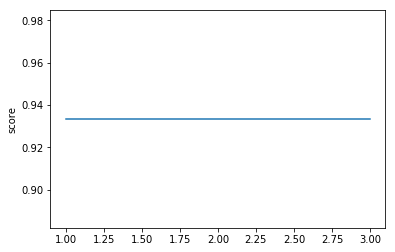

In [45]:
# my class
val_x = []
val_y = []
for k in range(1,4):
    cls = KNeighborsClassifier(n_neighbors=k)
    cls.fit(X_train, y_train)
    val_x.append(k)
    val_y.append(cls.score(X_test, y_test))
plt.plot(val_x, val_y)
plt.ylabel('score')
plt.show()

**MNIST**

In [21]:
mnist = fetch_mldata('MNIST original')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [23]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 37.4 s, sys: 288 ms, total: 37.7 s
Wall time: 42.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [24]:
%time my_clf.fit(X_train, y_train)

CPU times: user 33.4 ms, sys: 63.8 ms, total: 97.2 ms
Wall time: 96.1 ms


In [31]:
%time clf.predict(X_test)

CPU times: user 10min 1s, sys: 63.4 ms, total: 10min 1s
Wall time: 10min 1s


array([0., 3., 3., ..., 5., 7., 0.])

In [26]:
%time my_clf.predict(X_test)

CPU times: user 47.3 s, sys: 5.2 s, total: 52.5 s
Wall time: 48.9 s


array([0., 3., 3., ..., 5., 7., 0.])

In [29]:
%time clf.predict_proba(X_test)

CPU times: user 10min 7s, sys: 73.1 ms, total: 10min 7s
Wall time: 10min 7s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [27]:
%time my_clf.predict_proba(X_test)

CPU times: user 46.3 s, sys: 5.04 s, total: 51.4 s
Wall time: 46.8 s


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [30]:
clf.score(X_test, y_test)

0.9654285714285714

In [25]:
my_clf.score(X_test, y_test)

0.9654285714285714

Задание 5

##### seaborn
Выскоуровневая библиотека для визуализации статистических данных основанная на matplotlib

##### matplotlib
Библиотека для построения графиков

##### train_test_split
метод из sklearn, позволяющий разделять датасет на тестовые и обучающие данные

##### Pipelin%load_exte (from sklearn.pipeline import Pipeline)
Magic method загружающий соответствующий модуль
##### StandardScaler (from sklearn.preprocessing import StandardScaler)
Класс для маштабирования данных: вычитает mean и делит на std датасет

##### ClassifierMixin
Базовый класс для всех классификаторов. Содержит метод score, который 
определяет среднюю точность предсказанных данных

##### NeighborsBase
Базовый класс для оценки ближайших соседей

##### KNeighborsMixin
Базовый класс для методов KNN

##### SupervisedIntegerMixin
Класс содержащий метод для обучения на данных с целым типом